# Supermarket Sales

### Importing Libraries

In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
plt.rcParams['figure.figsize'] = 15, 10
import datetime as dt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### Importing Dataset 

In [106]:
df = pd.read_csv('supermarket_sales - Sheet1.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [107]:
df.shape

(1000, 17)

In [108]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [109]:
# No null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [110]:
# No Duplicates 
df.duplicated().sum()

0

In [111]:
# Droping 'Invoice ID' as its not needed

df.drop(columns=['Invoice ID','Tax 5%','gross margin percentage','cogs'], inplace=True)
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Date,Time,Payment,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,1/5/2019,13:08,Ewallet,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,3/8/2019,10:29,Cash,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,340.5255,3/3/2019,13:23,Credit card,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,489.0480,1/27/2019,20:33,Ewallet,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,634.3785,2/8/2019,10:37,Ewallet,30.2085,5.3


In [112]:
# Dealing with Date and Time attribute
print(type(df['Date']))
print(type(df['Time']))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [113]:
df['Day']=pd.to_datetime(df['Date']).dt.day
df['Month']=pd.to_datetime(df['Date']).dt.month

In [114]:
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Date,Time,Payment,gross income,Rating,Day,Month
0,A,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,1/5/2019,13:08,Ewallet,26.1415,9.1,5,1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,3/8/2019,10:29,Cash,3.8200,9.6,8,3
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,340.5255,3/3/2019,13:23,Credit card,16.2155,7.4,3,3
3,A,Yangon,Member,Male,Health and beauty,58.22,8,489.0480,1/27/2019,20:33,Ewallet,23.2880,8.4,27,1
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,634.3785,2/8/2019,10:37,Ewallet,30.2085,5.3,8,2


In [115]:
df['Hour']=pd.to_datetime(df['Time']).dt.hour
df['Minute']=pd.to_datetime(df['Time']).dt.minute
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Date,Time,Payment,gross income,Rating,Day,Month,Hour,Minute
0,A,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,1/5/2019,13:08,Ewallet,26.1415,9.1,5,1,13,8
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,3/8/2019,10:29,Cash,3.8200,9.6,8,3,10,29
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,340.5255,3/3/2019,13:23,Credit card,16.2155,7.4,3,3,13,23
3,A,Yangon,Member,Male,Health and beauty,58.22,8,489.0480,1/27/2019,20:33,Ewallet,23.2880,8.4,27,1,20,33
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,634.3785,2/8/2019,10:37,Ewallet,30.2085,5.3,8,2,10,37


In [116]:
df.drop(columns=['Date','Time'], inplace=True)

In [117]:
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Payment,gross income,Rating,Day,Month,Hour,Minute
0,A,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,Ewallet,26.1415,9.1,5,1,13,8
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,Cash,3.8200,9.6,8,3,10,29
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,340.5255,Credit card,16.2155,7.4,3,3,13,23
3,A,Yangon,Member,Male,Health and beauty,58.22,8,489.0480,Ewallet,23.2880,8.4,27,1,20,33
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,634.3785,Ewallet,30.2085,5.3,8,2,10,37


### EDA

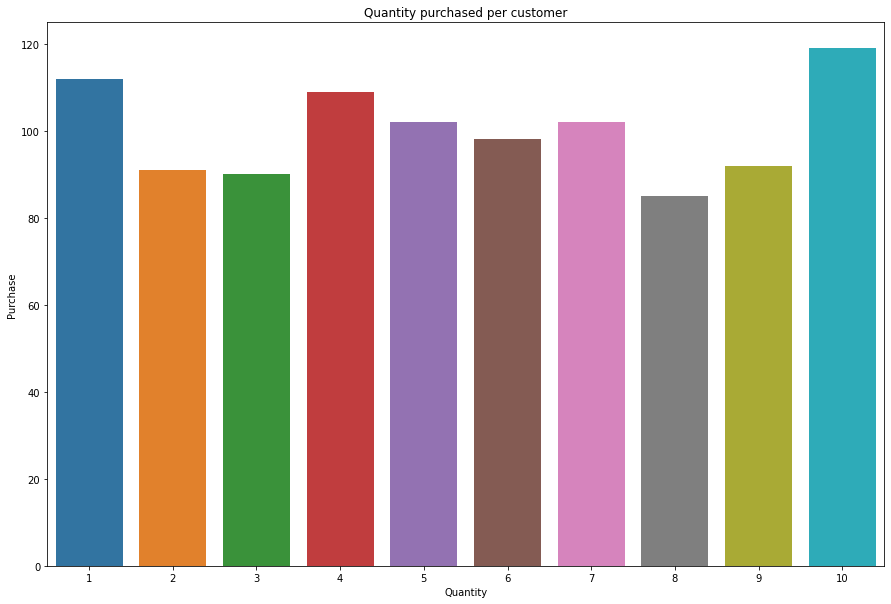

In [118]:
# Lets see how many Quantity is bought customers
sns.countplot(data=df,x="Quantity")
plt.xlabel('Quantity')
plt.ylabel('Purchase')
plt.title('Quantity purchased per customer')
plt.show()

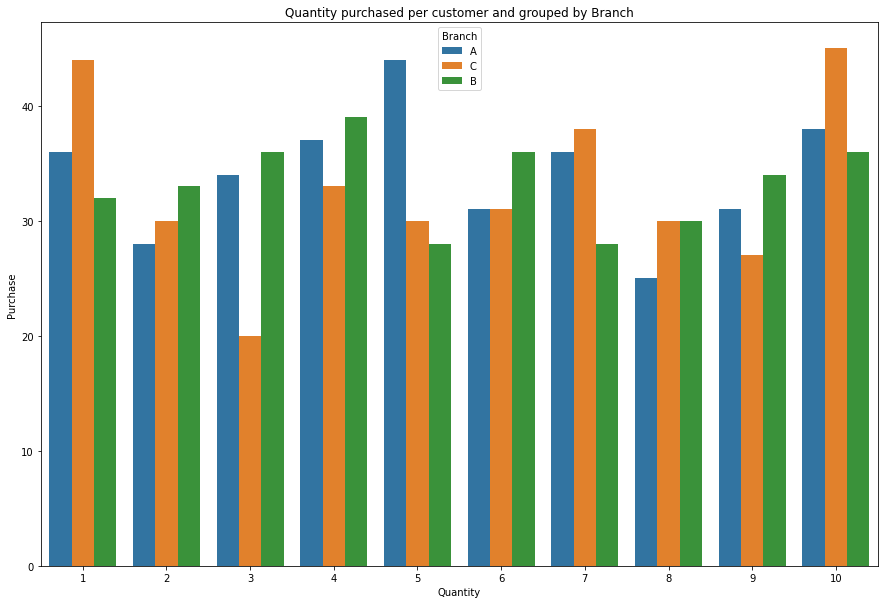

In [119]:
# Spliting by bracnhes
sns.countplot(data=df,x="Quantity", hue='Branch')
plt.xlabel('Quantity')
plt.ylabel('Purchase')
plt.title('Quantity purchased per customer and grouped by Branch')
plt.show()

In [120]:
# Types of payment option used
df['Payment'].unique()

array(['Ewallet', 'Cash', 'Credit card'], dtype=object)

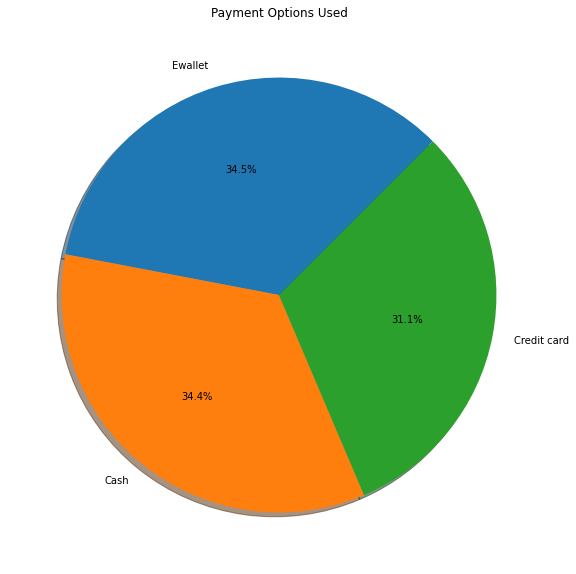

In [121]:
plt.pie(df['Payment'].value_counts(),labels=df['Payment'].value_counts().index, autopct='%1.1f%%',shadow=True, startangle=45)
plt.title('Payment Options Used')
plt.show()

In [122]:
#Product line
df['Product line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

<Axes: xlabel='Product line', ylabel='count'>

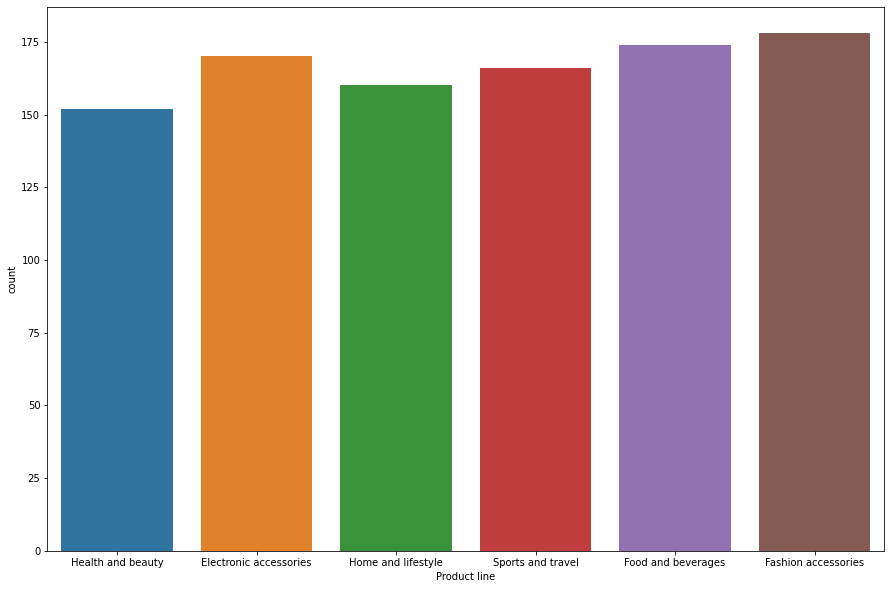

In [123]:
sns.countplot(data = df, x='Product line')

In [124]:
df['City'].unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [125]:
city = df['City'].unique()
city_count = [df['City'].value_counts()['Yangon'], df['City'].value_counts()['Naypyitaw'],df['City'].value_counts()['Mandalay']]
city_count

[340, 328, 332]

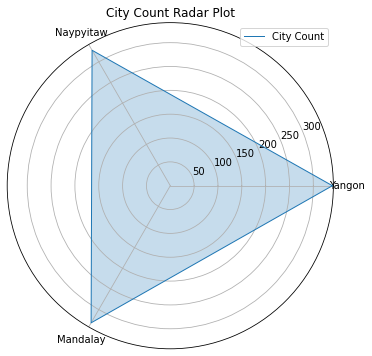

In [126]:

# Compute angle and normalize the data
angles = np.linspace(0, 2 * np.pi, len(city), endpoint=False).tolist()
city_count.append(city_count[0])
angles.append(angles[0])

# Create the radar plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'polar': True})
ax.plot(angles, city_count, linewidth=1, linestyle='solid', label='City Count')
ax.fill(angles, city_count, alpha=0.25)

# Set the labels for each axis
ax.set_xticks(angles[:-1])
ax.set_xticklabels(city)

# Set the maximum value for the radial axis
ax.set_ylim(0, max(city_count) + 2)

# Add a legend and title
ax.legend(loc='upper right')
plt.title('City Count Radar Plot')

# Display the radar plot
plt.show()


In [127]:
import plotly.graph_objects as go
import plotly.offline as pyo


genre = ['Action', 'Comedy', 'Drama', 'Horror', 'Mystery', 'Romance']
c_1 = [22, 98, 8, 109, 111, 29]
c_2 = [49, 67, 140, 13, 24]
c_3 = [34, 45, 57, 34, 77, 25]


fig = go.Figure(
    data=[
        go.Scatterpolar(r=c_1, theta=genre, fill='toself', name='Customer 1'),
        go.Scatterpolar(r=c_2, theta=genre, fill='toself', name='Customer 2'),
        go.Scatterpolar(r=c_3, theta=genre, fill='toself', name='Customer 3')
    ],
    layout=go.Layout(
        title=go.layout.Title(text='Customer movie genre comparison'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)
plt.show()

<Axes: >

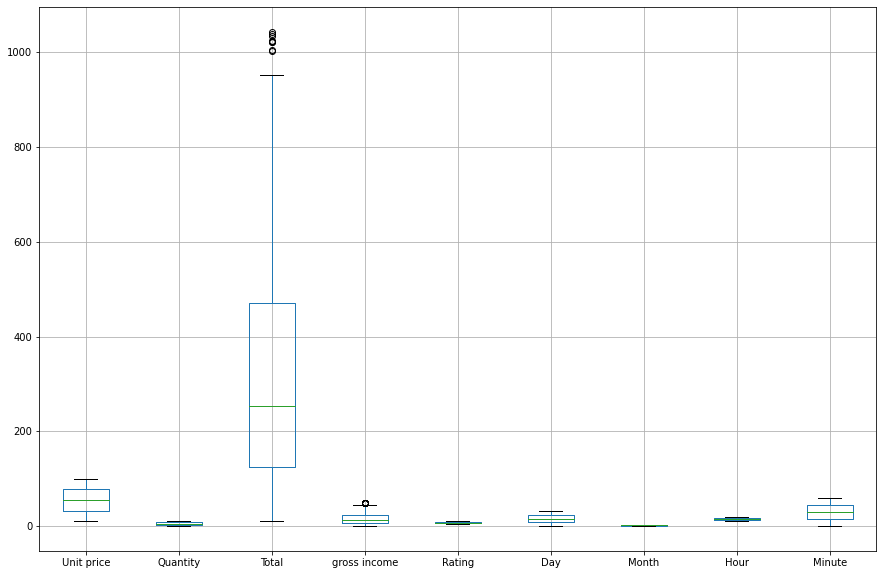

In [128]:
df.boxplot()

<Axes: xlabel='Rating', ylabel='count'>

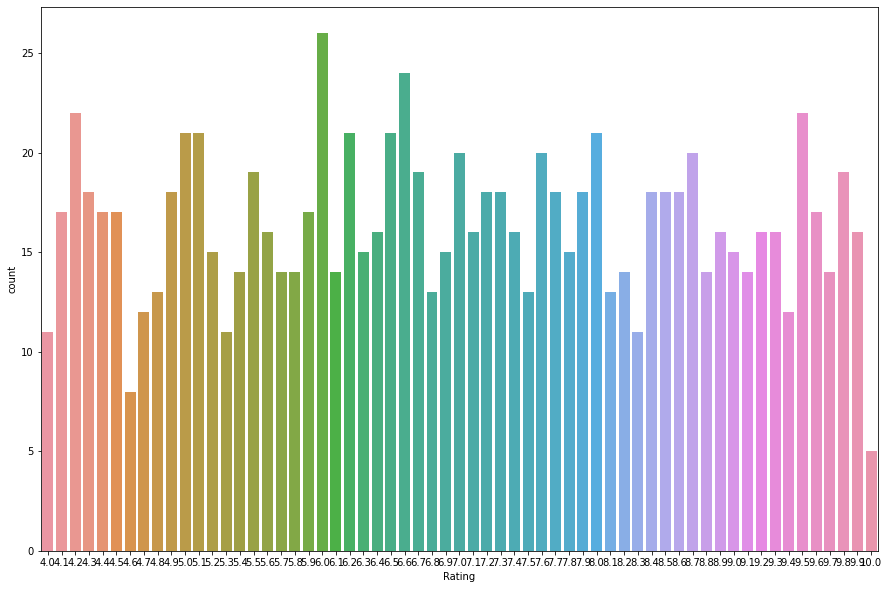

In [129]:
sns.countplot(data=df, x='Rating', )

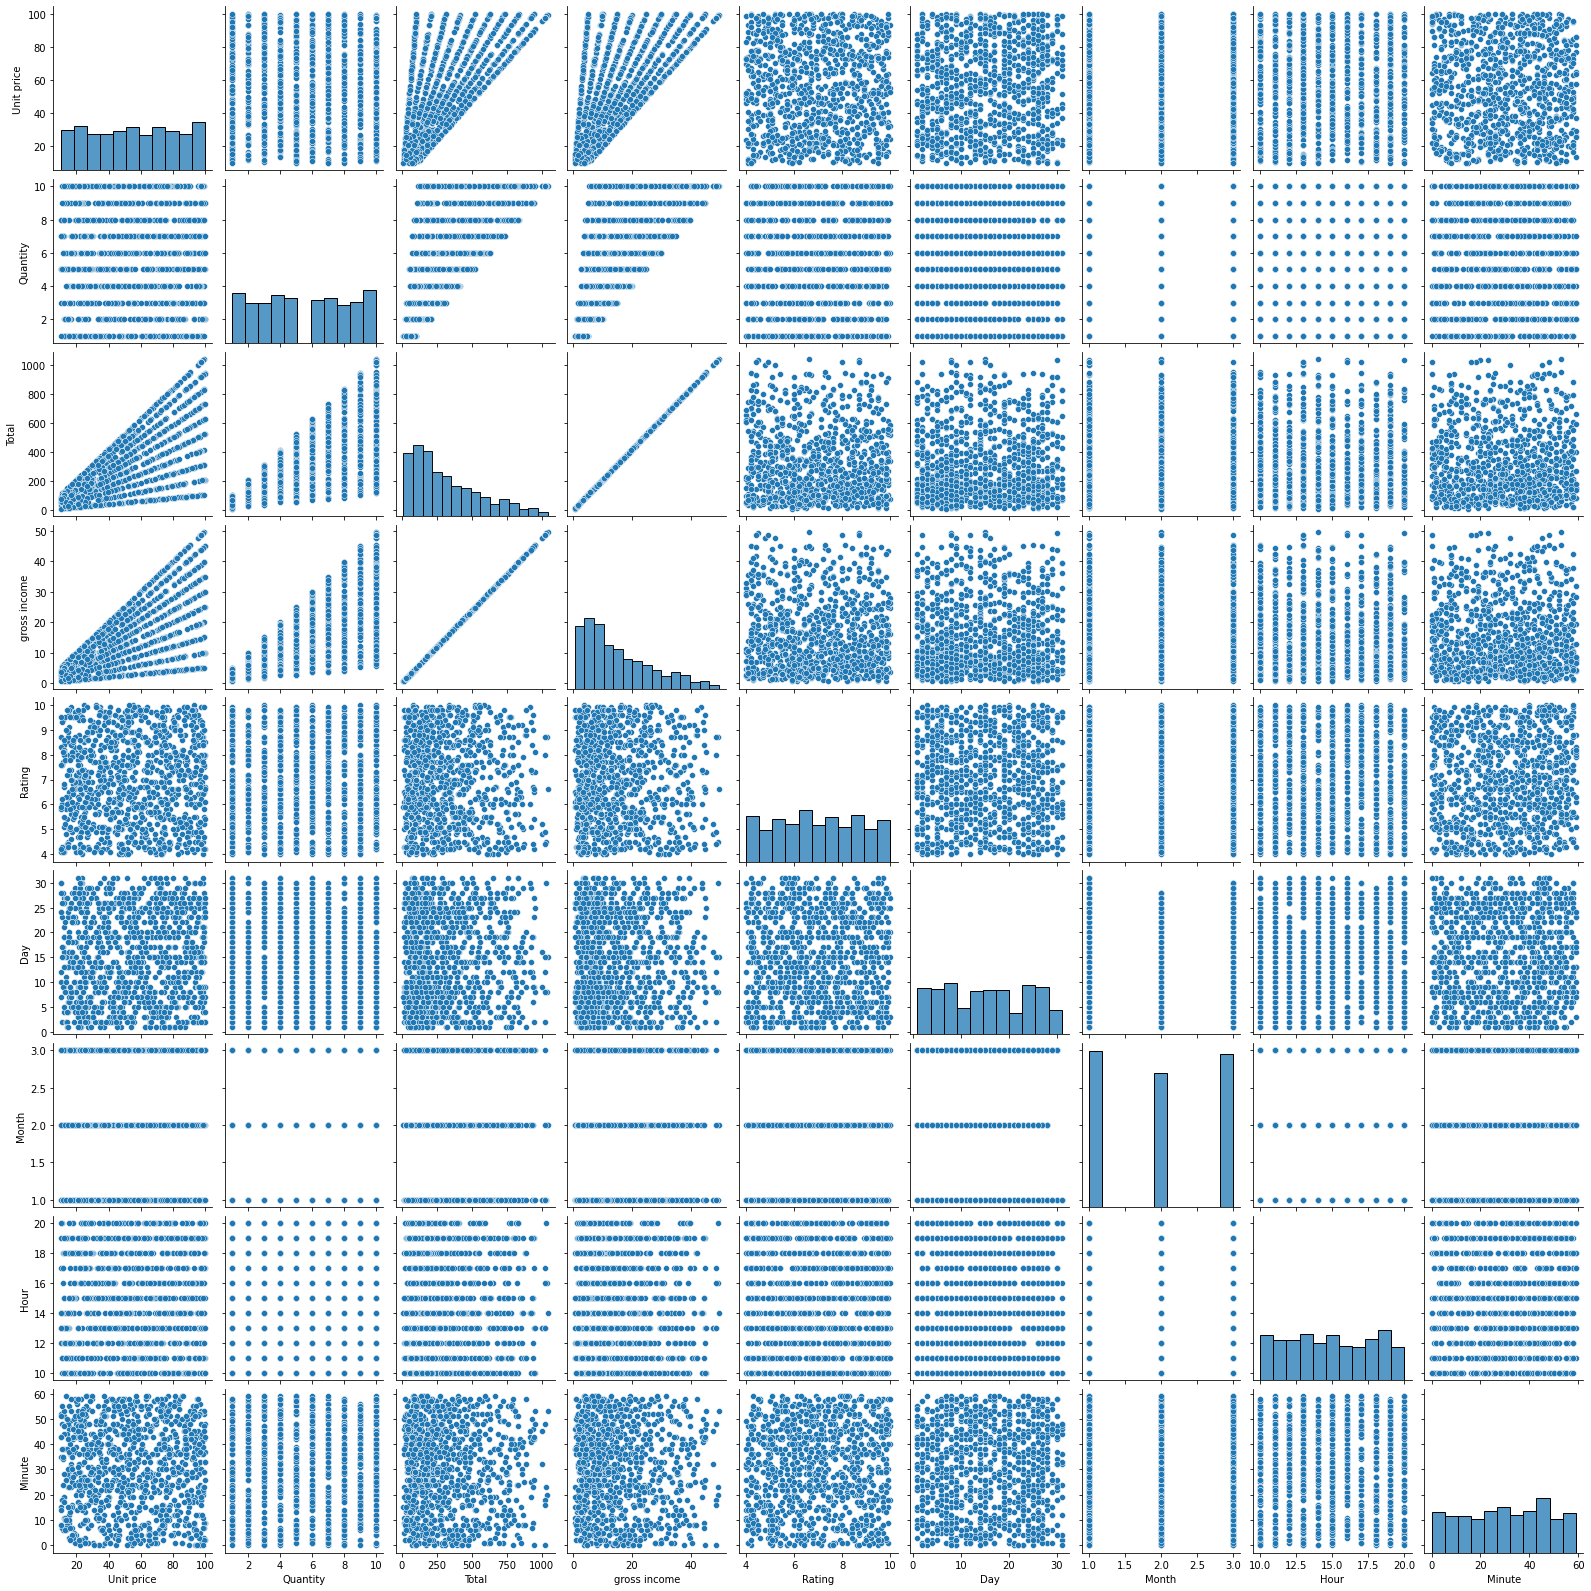

In [130]:
sns.pairplot(df)

<Axes: >

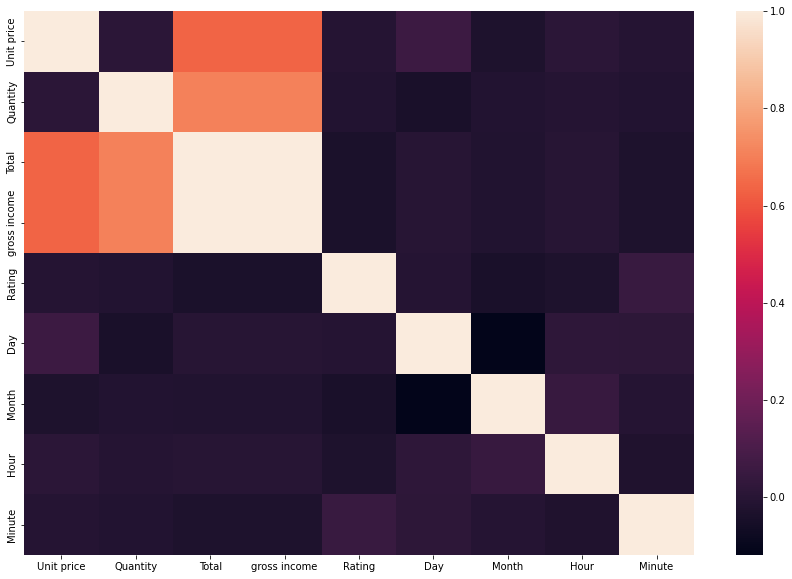

In [131]:
sns.heatmap(df.corr())

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Branch         1000 non-null   object 
 1   City           1000 non-null   object 
 2   Customer type  1000 non-null   object 
 3   Gender         1000 non-null   object 
 4   Product line   1000 non-null   object 
 5   Unit price     1000 non-null   float64
 6   Quantity       1000 non-null   int64  
 7   Total          1000 non-null   float64
 8   Payment        1000 non-null   object 
 9   gross income   1000 non-null   float64
 10  Rating         1000 non-null   float64
 11  Day            1000 non-null   int64  
 12  Month          1000 non-null   int64  
 13  Hour           1000 non-null   int64  
 14  Minute         1000 non-null   int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 117.3+ KB


In [133]:
# Time features
def map_hour_interval(hour):
    
    if 6 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 18:
        return 'afternoon'
    elif 18 <= hour < 24:
        return 'evening'
    else:
        return 'night'

    # Apply the function to the 'Time' column
df['hour_interval'] = df['Hour'].apply(map_hour_interval)

In [134]:
# One-Hot Encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['City', 'Customer type', 'Gender', 'Product line', 'hour_interval'], drop_first=True)

In [135]:
df_encoded.head()

,Branch,Unit price,Quantity,Total,Payment,gross income,Rating,Day,Month,Hour,...,City_Yangon,Customer type_Normal,Gender_Male,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,hour_interval_evening,hour_interval_morning
0,A,74.69,7,548.9715,Ewallet,26.1415,9.1,5,1,13,...,1,0,0,0,0,1,0,0,0,0
1,C,15.28,5,80.2200,Cash,3.8200,9.6,8,3,10,...,0,1,0,0,0,0,0,0,0,1
2,A,46.33,7,340.5255,Credit card,16.2155,7.4,3,3,13,...,1,1,1,0,0,0,1,0,0,0
3,A,58.22,8,489.0480,Ewallet,23.2880,8.4,27,1,20,...,1,0,1,0,0,1,0,0,1,0
4,A,86.31,7,634.3785,Ewallet,30.2085,5.3,8,2,10,...,1,1,1,0,0,0,0,1,0,1


In [138]:
# Identify non-numeric columns
non_numeric_columns = df_encoded.select_dtypes(include=['object']).columns

In [139]:
# Perform One-Hot Encoding for the remaining non-numeric columns
df_encoded = pd.get_dummies(df_encoded, columns=non_numeric_columns, drop_first=True)

In [141]:
# Define target variable and features
X = df_encoded.drop('Rating', axis=1)
y = df_encoded['Rating']

In [152]:
# Split data

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [153]:
# Standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [158]:
# Model comparison

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor(),
    "Neural Network": MLPRegressor(max_iter=2000)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    results[name] = r2
    print(f"{name}: {r2}")

Linear Regression: -0.047038704123321784
Decision Tree: -1.1314968256963986
Random Forest: -0.07519857005730857
SVR: -0.1496722537555366
KNN: -0.1525182831009959
Neural Network: -0.8766399006089955


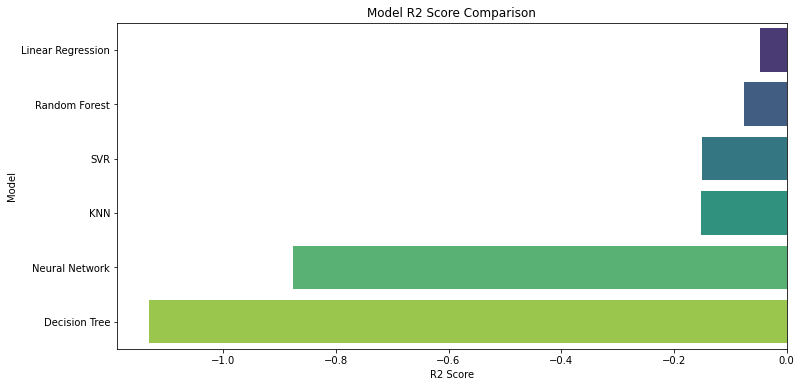

In [159]:
# Visualization
results_df = pd.DataFrame({"Model": list(results.keys()), "R2 Score": list(results.values())})
results_df = results_df.sort_values(by="R2 Score", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x="R2 Score", y="Model", palette="viridis")
plt.title("Model R2 Score Comparison")
plt.xlabel("R2 Score")
plt.ylabel("Model")
plt.show()